@authors:
    
**Mohammad Maleki**

**Nikkie Hooman**
<br>

# --------------------------------------------------------------------------------------------------------

## 1. Data Prepration

## 1.1. Defining and preparing class variables


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading the dataset
data = pd.read_csv("/ML in Python/Lab 5/bank.csv") 
# Check the number of missing values in each column of the data dataset
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
# Check the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (11162, 17)


In [5]:
# Check the unique values in each column
print("Unique values:\n", data.nunique())

Unique values:
 age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64


In [6]:
# Remove variables that are not needed/useful for the analysis
data = data.drop(['day', 'month'], axis=1)

In [7]:
# Remove any observation that having missing data
data.dropna(axis=0,how='any',inplace=True)
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   duration   11162 non-null  int64 
 10  campaign   11162 non-null  int64 
 11  pdays      11162 non-null  int64 
 12  previous   11162 non-null  int64 
 13  poutcome   11162 non-null  object
 14  deposit    11162 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.3+ MB


In [9]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (11162, 15)


In [10]:
col_names = ['Categorical Columns','num_Levels','Levels','Definition']
df1 = np.array([['job', '11','admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services,student,technician,unemployed,unknown','the occupation of the customer'],
                ['marital', '3','married,single,divorce','the marital status of the customer'],
                ['education','4','primary,secondary,tertiary,unknown','the education level of the customer'],     
                ['default ','2','yes or no','whether the customer has credit in default'],      
                ['housing','2','yes or no','whether the customer has a housing loan'],
                 ['loan','2','yes or no','whether the customer has a personal loan'],
                  ['contact','2','cellular,telephone',"the type of communication contact"],
                  ['poutcome','3','success,failure,other','the outcome of the previous marketing campaign '],
                ])
data1 = pd.DataFrame(df1,columns=col_names)
data1

,Categorical Columns,num_Levels,Levels,Definition
0,job,11,"admin, blue-collar, entrepreneur, housemaid, m...",the occupation of the customer
1,marital,3,"married,single,divorce",the marital status of the customer
2,education,4,"primary,secondary,tertiary,unknown",the education level of the customer
3,default,2,yes or no,whether the customer has credit in default
4,housing,2,yes or no,whether the customer has a housing loan
5,loan,2,yes or no,whether the customer has a personal loan
6,contact,2,"cellular,telephone",the type of communication contact
7,poutcome,3,"success,failure,other",the outcome of the previous marketing campaign


In [11]:
col_names = ['Numeric Columns','Type','Definition']
df = np.array([['age','Integer','the age of the customer'],
                 ['balance','Integer',"the balance of the customer's account"],
                 ['duration','Integer',"the duration of the last contact in seconds"],
                ['campaign',"Integer","the number of contacts performed during this campaign and for this client"],
                ['previous','Integer','the number of contacts performed before this campaign and for this client'],
               ['recent_pdays','Integer','a newly created variable to capture the number of days since the customer was last contacted']
               ])


data2 = pd.DataFrame(df,columns=col_names)
data2

,Numeric Columns,Type,Definition
0,age,Integer,the age of the customer
1,balance,Integer,the balance of the customer's account
2,duration,Integer,the duration of the last contact in seconds
3,campaign,Integer,the number of contacts performed during this c...
4,previous,Integer,the number of contacts performed before this c...
5,recent_pdays,Integer,a newly created variable to capture the number...


In [12]:
# Create a new variable 'recent_pdays' to capture the number of days since the customer was last contacted
data['recent_pdays'] = np.where(data['pdays'] == -1, 999, data['pdays'])
data = data.drop('pdays', axis=1)

In [13]:
# Scale the continuous variables using StandardScaler
ss = StandardScaler()
continuous_cols = ['age', 'balance', 'duration', 'campaign', 'previous', 'recent_pdays']
data[continuous_cols] = ss.fit_transform(data[continuous_cols])

In [14]:
# Preview the final dataset
data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,deposit,recent_pdays
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,1.930226,-0.554168,-0.363260,unknown,yes,0.574852
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,3.154612,-0.554168,-0.363260,unknown,yes,0.574852
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,2.929901,-0.554168,-0.363260,unknown,yes,0.574852
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,0.596366,-0.554168,-0.363260,unknown,yes,0.574852
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,0.867171,-0.186785,-0.363260,unknown,yes,0.574852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,blue-collar,single,primary,no,-0.473616,yes,no,cellular,-0.331287,-0.554168,-0.363260,unknown,no,0.574852
11158,-0.187357,services,married,secondary,no,-0.246658,no,no,unknown,-0.832564,0.547981,-0.363260,unknown,no,0.574852
11159,-0.774958,technician,single,secondary,no,-0.464934,no,no,cellular,-0.622258,-0.186785,-0.363260,unknown,no,0.574852
11160,0.148416,technician,married,secondary,no,-0.473926,no,yes,cellular,-1.045752,-0.186785,1.818332,failure,no,-1.779499


In [15]:
cat_features = ['job','marital','education',
                'default','housing','loan','contact', 'poutcome']
numeric_features = ['age','balance','duration','campaign','previous','recent_pdays']
keep_features = cat_features+numeric_features+['deposit']
X = data[keep_features]
X

,job,marital,education,default,housing,loan,contact,poutcome,age,balance,duration,campaign,previous,recent_pdays,deposit
0,admin.,married,secondary,no,yes,no,unknown,unknown,1.491505,0.252525,1.930226,-0.554168,-0.363260,0.574852,yes
1,admin.,married,secondary,no,no,no,unknown,unknown,1.239676,-0.459974,3.154612,-0.554168,-0.363260,0.574852,yes
2,technician,married,secondary,no,yes,no,unknown,unknown,-0.019470,-0.080160,2.929901,-0.554168,-0.363260,0.574852,yes
3,services,married,secondary,no,yes,no,unknown,unknown,1.155733,0.293762,0.596366,-0.554168,-0.363260,0.574852,yes
4,admin.,married,tertiary,no,no,no,unknown,unknown,1.071790,-0.416876,0.867171,-0.186785,-0.363260,0.574852,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,unknown,-0.691015,-0.473616,-0.331287,-0.554168,-0.363260,0.574852,no
11158,services,married,secondary,no,no,no,unknown,unknown,-0.187357,-0.246658,-0.832564,0.547981,-0.363260,0.574852,no
11159,technician,single,secondary,no,no,no,cellular,unknown,-0.774958,-0.464934,-0.622258,-0.186785,-0.363260,0.574852,no
11160,technician,married,secondary,no,no,yes,cellular,failure,0.148416,-0.473926,-1.045752,-0.186785,1.818332,-1.779499,no


## 1.2. Cross-product features

Now, let's identify groups of features that should be combined into cross-product features. Based on domain knowledge and data analysis, we can combine the following features:
Age and Job: 
* Age and job may have a combined effect on a customer's decision to make a deposit. For example, younger customers may be more likely to make deposits if they have high-paying jobs or are in certain industries.
* Education and Default: Education and default status may be related, as customers with lower levels of education may be more likely to default on loans or have financial difficulties.
* Housing and Loan: Housing and loan status may be related, as customers who own their homes may be less likely to take out loans or have different financial priorities.
* Pdays and Poutcome: Pdays (days since the customer was last contacted) and Poutcome (outcome of the previous marketing campaign) may be related, as customers who were recently contacted or had a positive outcome in the previous campaign may be more likely to make a deposit in the current campaign.

Crossing these features can potentially capture more complex relationships and improve the performance of our algorithm.
Next, let's choose the metric(s) to evaluate our algorithm's performance. In the context of bank marketing, the business case is to maximize the number of successful deposits (i.e., True Positive). Therefore, we should choose a metric that prioritizes the True Positive rate, such as precision, recall, or F1 score. Accuracy can be misleading if the dataset is imbalanced, which is the case for our dataset.

For our classification model, we will use Stratified 10-fold cross-validation to split the data into training and testing sets. Stratified sampling ensures that each fold has the same proportion of classes as the original dataset. This method is appropriate for our dataset because it is imbalanced (the majority of the samples are negative for the target variable). Using k-fold cross-validation can also reduce the risk of overfitting and provide a more reliable estimate of the model's performance.

## 1.3. Explanation of chosen metrics

For classification tasks in the bank marketing dataset, the accuracy metric may not be the best choice for evaluating algorithm performance. This is because the dataset is imbalanced, with a majority of the observations belonging to the negative class (customers who did not make a deposit) and a minority belonging to the positive class (customers who made a deposit). In such cases, accuracy may be misleading as a performance metric since a model can achieve high accuracy by simply predicting the majority class all the time.

A better metric to evaluate algorithm performance in imbalanced datasets is the F1 score, which is a combination of precision and recall. The F1 score is appropriate in this case because it considers both false positives and false negatives, which are important considerations in the context of marketing campaigns. False positives (predicting that a customer will make a deposit when they actually won't) can result in wasted resources for the bank, while false negatives (predicting that a customer won't make a deposit when they actually will) can result in missed opportunities.

In addition to the F1 score, we can also use the area under the receiver operating characteristic curve (AUC-ROC) as a performance metric. The AUC-ROC is a useful metric in imbalanced datasets because it evaluates the performance of a model across all possible classification thresholds, making it a good indicator of the model's ability to distinguish between positive and negative classes.

## 1.4. Splitting Dataset

The chosen method is upsampling the minority class using stratified random sampling to balance the class distribution in the training data. This is appropriate as it addresses the issue of class imbalance, which can result in poor model performance, particularly for the minority class. Upsampling the minority class using stratified random sampling ensures that the upsampled data retains the same class distribution as the original minority class, and therefore, preserves the underlying patterns and relationships in the data.

Stratified random sampling is used in the upsampling process to ensure that the minority class is sampled in proportion to its representation in the original data. This is important as it prevents over-representation of the minority class, which can lead to overfitting, and ensures that the upsampled data is representative of the original data.

The choice of an 80/20 split for training and testing data is a common practice and appropriate as it allows for a sufficient amount of data to be used for training while still providing enough data for testing and evaluation. The use of stratified sampling in the train-test split ensures that the class distribution is maintained in both the training and testing data sets.

Regarding cross-validation, the same k-fold cross-validation approach as described earlier can be used to evaluate the model's performance. In this case, it would involve training and testing the model on different subsets of the training data, with the class distribution being maintained using stratified random sampling. This approach is realistic as it mirrors how an algorithm would be used in practice, where the model is trained on a subset of the data and tested on unseen data, and cross-validated to ensure its generalizability.

In [16]:
# split the data into training/testing data using an 80/20 split with stratified sampling
from sklearn.model_selection import train_test_split

data_copy = data.copy()
data_train, data_test = train_test_split(data_copy, test_size=0.2, random_state=10, stratify=data_copy['deposit'])
data_majority = data_train[data_train.deposit=='no']
data_minority = data_train[data_train.deposit=='yes']

# Upsample minority class using stratified random sampling
from sklearn.utils import resample
num=data_train[data_train.deposit=='no'].deposit.count()
data_minority_upsampled = resample(data_minority,
                                   replace=True,     # sample with replacement
                                   n_samples=num,    # to match majority class
                                   stratify=data_minority['deposit'], # use stratified random sampling
                                   random_state=123)

# Combine majority class with upsampled minority class
data_train = pd.concat([data_majority, data_minority_upsampled])


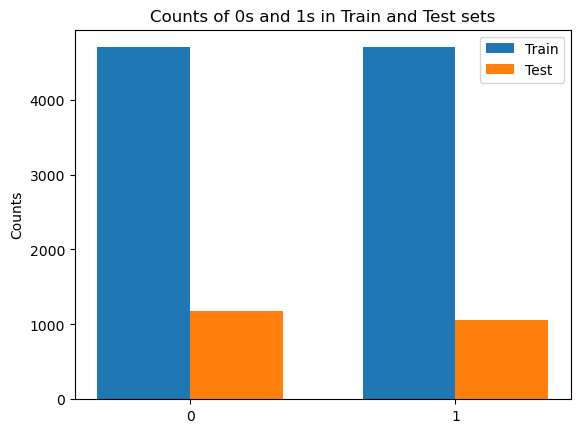

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# Get the counts of 0s and 1s in the train and test sets
counts_train = data_train['deposit'].value_counts().values
counts_test = data_test['deposit'].value_counts().values

# Create a bar chart
labels = ['0', '1']
train_counts = [counts_train[0], counts_train[1]]
test_counts = [counts_test[0], counts_test[1]]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_counts, width, label='Train')
rects2 = ax.bar(x + width/2, test_counts, width, label='Test')
ax.set_ylabel('Counts')
ax.set_title('Counts of 0s and 1s in Train and Test sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()


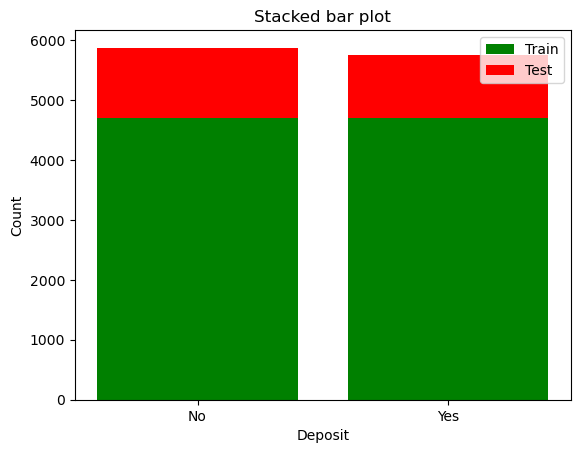

In [18]:
# Calculate the number of instances for each label in the training and testing sets
unique_train, counts_train = np.unique(data_train['deposit'], return_counts=True)
unique_test, counts_test = np.unique(data_test['deposit'], return_counts=True)

# Create a stacked bar plot
fig, ax = plt.subplots()
ax.bar(unique_train, counts_train, color='green', label='Train')
ax.bar(unique_test, counts_test, bottom=counts_train, color='red', label='Test')
ax.set_title('Stacked bar plot')
ax.set_xlabel('Deposit')
ax.set_ylabel('Count')
ax.set_xticks(unique_train)
ax.set_xticklabels(['No', 'Yes'])
ax.legend()
plt.show()



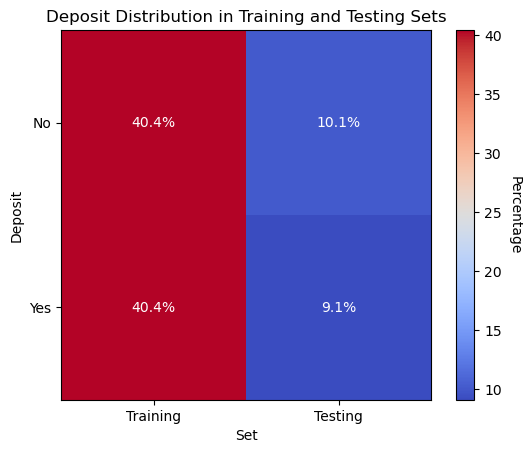

In [19]:


# Calculate the number of instances for each label in the training and testing sets
unique_train, counts_train = np.unique(data_train['deposit'], return_counts=True)
unique_test, counts_test = np.unique(data_test['deposit'], return_counts=True)

# Create a 2x2 array of counts for the labels
counts = np.array([[counts_train[0], counts_test[0]], [counts_train[1], counts_test[1]]])

# Normalize the counts to percentages
percentages = (counts / np.sum(counts)) * 100

# Create a heatmap
fig, ax = plt.subplots()
im = ax.imshow(percentages, cmap='coolwarm')
ax.set_title('Deposit Distribution in Training and Testing Sets')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Training', 'Testing'])
ax.set_yticklabels(['No', 'Yes'])
ax.set_xlabel('Set')
ax.set_ylabel('Deposit')

# Add value annotations to the heatmap
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, '{:.1f}%'.format(percentages[i, j]),
                       ha='center', va='center', color='w')

# Add a colorbar to the heatmap
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Percentage', rotation=-90, va='bottom')

plt.show()


In [20]:
from sklearn import metrics as mt
import keras
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Concatenate
from keras.models import Model

In [21]:
import warnings

# Ignore warning messages
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert numeric features to float and scale them using StandardScaler
for col in numeric_features:
    data_train[col] = data_train[col].astype(np.float)
    data_test[col] = data_test[col].astype(np.float)
    
    data_train[col] = ss.fit_transform(data_train[col].values.reshape(-1, 1))
    data_test[col] = ss.transform(data_test[col].values.reshape(-1, 1))

# Define objects that can encode each categorical variable as an integer    
encoders = dict() 
for col in cat_features+['deposit']:
    data_train[col] = data_train[col]
    data_test[col] = data_test[col]
    
    if col=='deposit':
        # Encode the target variable 'deposit' as an integer using LabelEncoder
        tmp = LabelEncoder()
        data_train[col] = tmp.fit_transform(data_train[col]).astype(str)
        data_test[col] = tmp.transform(data_test[col]).astype(str)
    else:
        # Encode other categorical variables as integers using LabelEncoder
        encoders[col] = LabelEncoder() # save the encoder
        data_train[col+'_int'] = encoders[col].fit_transform(data_train[col]).astype(str)
        data_test[col+'_int'] = encoders[col].transform(data_test[col]).astype(str)

# Display the first five rows of the transformed X_test dataframe
data_test.head()


,age,job,marital,education,default,balance,housing,loan,contact,duration,...,deposit,recent_pdays,job_int,marital_int,education_int,default_int,housing_int,loan_int,contact_int,poutcome_int
10011,-1.093713,services,single,secondary,no,1.530517,yes,no,telephone,-0.661889,...,0,-1.249085,7,2,1,0,1,0,1,0
3424,-1.591186,management,single,tertiary,no,-0.458990,no,yes,cellular,-0.137323,...,1,0.590180,4,2,2,0,0,1,0,3
4799,-0.513329,management,divorced,tertiary,no,-0.353573,yes,no,cellular,2.714460,...,1,0.590180,4,0,2,0,1,0,0,3
10691,0.398703,management,divorced,secondary,no,-0.376892,yes,no,unknown,-0.844473,...,0,0.590180,4,0,1,0,1,0,2,3
72,-0.015857,retired,divorced,primary,no,-0.566643,yes,no,unknown,2.256552,...,1,0.590180,5,0,0,0,1,0,2,3


# 2. Modelling

In [22]:
numeric_cols = data_train[numeric_features].columns
data_train[numeric_cols] = ss.fit_transform(data_train[numeric_cols])
data_test[numeric_cols] = ss.transform(data_test[numeric_cols])

# Encode categorical features using LabelEncoder
encoders = {}
for col in cat_features:
    encoder = LabelEncoder()
    data_train[col+'_int'] = encoder.fit_transform(data_train[col])
    data_test[col+'_int'] = encoder.transform(data_test[col])
    encoders[col] = encoder

# Define feature and target variables
categorical_ints = [x+'_int' for x in cat_features]
cols = categorical_ints + list(numeric_cols)
X_train = data_train[cols].values.astype(np.float32)
X_test = data_test[cols].values.astype(np.float32)
y_train = data_train['deposit'].values.astype(np.int)
y_test = data_test['deposit'].values.astype(np.int)

print(cols)

['job_int', 'marital_int', 'education_int', 'default_int', 'housing_int', 'loan_int', 'contact_int', 'poutcome_int', 'age', 'balance', 'duration', 'campaign', 'previous', 'recent_pdays']


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the input tensor shape for the neural network
input_shape = (X_train.shape[1],)

# Define the neural network model with input and output layers
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=input_shape))
model.add(Dense(units=5, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model with 30 epochs and batch size of 32
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
test_acc = test_loss


print('Test accuracy:', test_acc)


Test accuracy: 0.4416899085044861


In [26]:
import tensorflow.keras.backend as K

# Define the recall metric as a function that takes in true and predicted labels
def recall(y_true, y_pred):
    # Calculate the number of true positives by multiplying the binary values of true and predicted labels
    true_positives = K.sum(K.cast(K.equal(y_true * y_pred, 1), dtype='float32'))
    
    # Calculate the number of possible positives by summing the binary values of true labels
    possible_positives = K.sum(K.cast(K.greater(y_true, 0), dtype='float32'))
    
    # Calculate recall by dividing true positives by the sum of possible positives and a small value epsilon to avoid division by zero
    recall = true_positives / (possible_positives + K.epsilon())
    
    # Return the calculated recall
    return recall

# Compile the model with stochastic gradient descent optimizer and binary cross-entropy loss
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[recall])

# Print a summary of the model architecture, including the layers and their output shapes
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense (Dense)               (None, 10)                150       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


According to the summary above, the model architecture seems simple, with a small number of parameters, and should be easy to train on a relatively small dataset. The small number of parameters suggests that the model may not be overly complex, which could be beneficial in terms of reducing the risk of overfitting. However, it is important to note that the effectiveness of the model ultimately depends on the quality and relevance of the input features, as well as the size and representativeness of the training dataset.

## 2.1. 1st Model

In [27]:
# import necessary modules from Keras
from keras.layers import Dense, Activation, Input
from keras.models import Model
import tensorflow as tf

# define the cross columns (categorical columns to be crossed)
cross_columns = [['age', 'job'],['education','default'],['housing','loan']]

# create empty lists to store intermediate results and inputs
embed_branches = []
X_ints_train, X_ints_test, all_inputs, all_wide_branch_outputs, all_deep_branch_outputs = [[] for i in range(5)]


# start the loop over the cross columns
for cols in cross_columns:
    # encode the columns as integers using LabelEncoder
    enc = LabelEncoder()
    
    # Step 1: concatenate the values in each row of the columns with '_' separator
    X_crossed_train = data_train[cols].astype(str).apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = data_test[cols].astype(str).apply(lambda x: '_'.join(x), axis=1)
    tmp_train = data_train[cols].astype(str)  # convert integers to strings so that .join works
    tmp_test = data_test[cols].astype(str)


    
    # Step 2: encode the crossed columns as integers using LabelEncoder
    # concatenate the training and test data
    X_crossed_all = np.hstack((X_crossed_train.values, X_crossed_test.values))

    # fit and transform the encoder on the concatenated data
    enc.fit(X_crossed_all)

    # transform the training and test data separately
    X_crossed_train = enc.transform(X_crossed_train.values)
    X_crossed_test = enc.transform(X_crossed_test.values)

    
    # Step 3: save the encoded values for each branch in separate lists
    X_ints_train.append(X_crossed_train)
    X_ints_test.append(X_crossed_test)
    
    # get the number of categories in the crossing
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
   
    # create the embedding branch for the crossed columns
    inputs = tf.keras.layers.Input(shape=(1,), dtype='int32', name='_'.join(cols))
    all_inputs.append(inputs) # save this as input for the keras.Model
    x = tf.keras.layers.Embedding(input_dim=N,
                                  output_dim=int(np.sqrt(N)),
                                  input_length=1,
                                  name='_'.join(cols)+'_embed')(inputs)
    x = tf.keras.layers.Flatten()(x)
    all_wide_branch_outputs.append(x) # save for concatenating later

In [28]:
# merge the wide branches together
from keras.layers import concatenate,Dense

# concatenate the outputs from all wide branches together
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')

# add a dense layer to the concatenated output from the wide branches
# to produce a single output value
wide_branch = Dense(units=1, activation='sigmoid', name='wide_combined')(wide_branch)

# deep branch
# add in the embeddings for all categorical features
for col in categorical_ints:
    # encode the categorical feature as integers
    X_ints_train.append(data_train[col].values.astype(np.int32))
    X_ints_test.append(data_test[col].values.astype(np.int32))
    
    # get the number of categories for the feature
    N = int(max(X_ints_train[-1]))+1
    
    # create an embedding layer for the feature
    inputs = Input(shape=(1,), dtype='int32', name=col)
    all_inputs.append(inputs)
    
    # create the embedding layer with input length 1
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1,
                  name=col+'_embed')(inputs)
    
    # flatten the embedding layer output
    x = Flatten()(x)
    
    # add the embedding layer output to the list of deep branch outputs
    all_deep_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
X_train_num = data_train[numeric_features].values.astype(np.int32)
X_test_num = data_test[numeric_features].values.astype(np.int32)

# create an input layer for the numeric data
all_inputs.append(Input(shape=(X_train_num.shape[1],),
                        sparse=False,
                        name='numeric_data'))

# add a dense layer to the numeric input layer
x = Dense(units=20, activation='relu', name='numeric_1')(all_inputs[-1])
all_deep_branch_outputs.append(x)

# concatenate the outputs from all deep branches together
deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')

# add dense layers to the concatenated output from the deep branches
deep_branch = Dense(units=50, activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep3')(deep_branch)

# concatenate the outputs from the wide and deep branches
final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')

# add a dense layer to the concatenated output from the wide and deep branches
# to produce a single output value
final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)

# create a keras model with all inputs and the final output
model1 = Model(inputs=all_inputs, outputs=final_branch)


In [29]:
unique_types = set()
for item in X_ints_train:
    unique_types.add(type(item))
print(unique_types)

{<class 'numpy.ndarray'>}


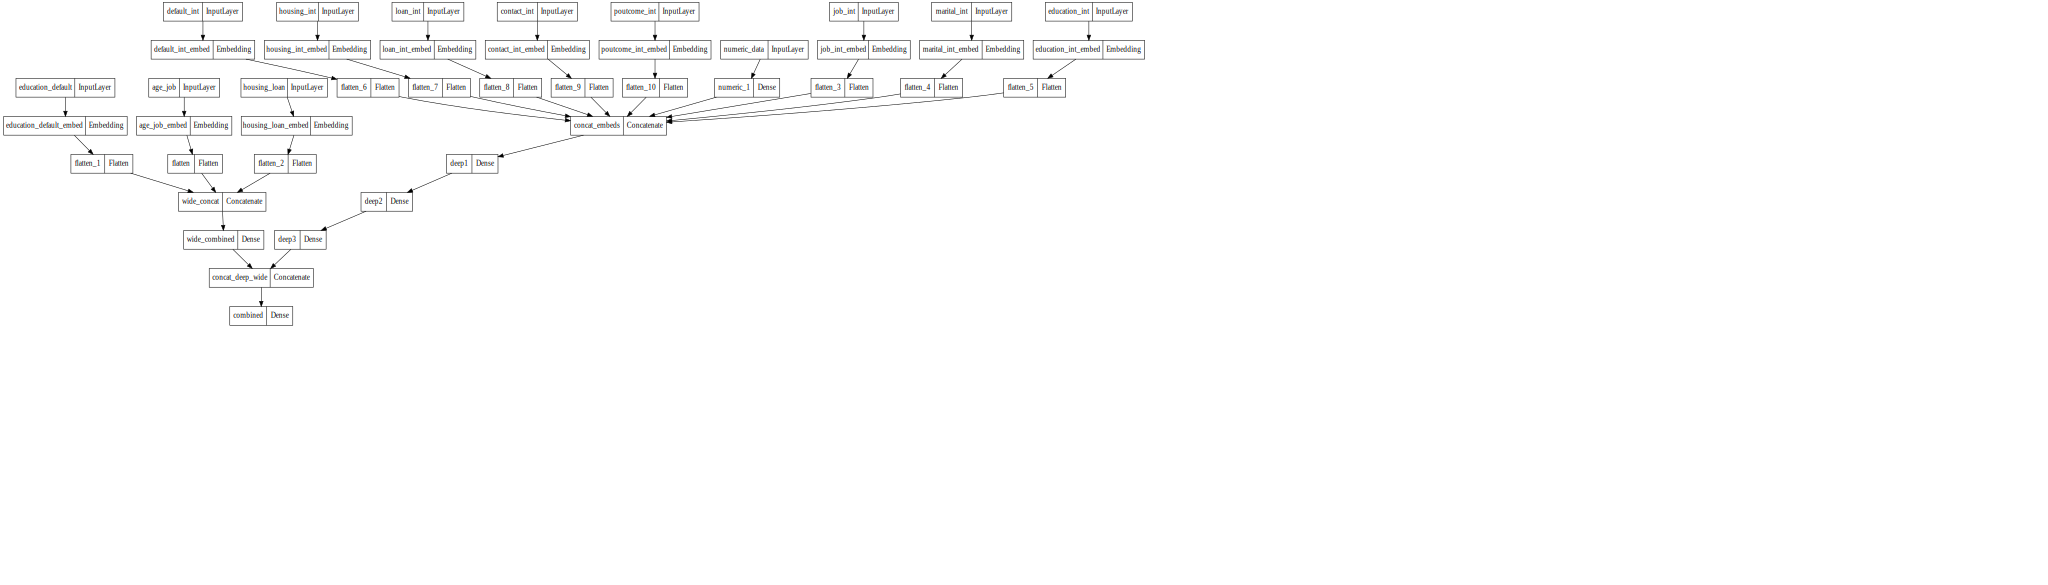

In [30]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Plot the model and save to a file
plot_model(model1, to_file='model1.png', show_shapes=True)

# Display the image file using IPython.display
from IPython.display import Image
Image(filename='model1.png')


In [31]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 job_int (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 marital_int (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 education_int (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 default_int (InputLayer)       [(None, 1)]          0           []                               
                                                                                            

In [32]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Recall

# Define optimizer, loss, and metrics for the model
optimizer = Adagrad()
loss = BinaryCrossentropy()
metrics = [Recall()]

# Compile the model with optimizer, loss, and metrics
model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Convert target variables to tensors
y_train = tf.constant(data_train['deposit'].values, dtype=tf.int32)
y_test = tf.constant(data_test['deposit'].values, dtype=tf.int32)

# Train the model with the training data and evaluate with the test data
history1 = model1.fit(x=[X_ints_train, X_train_num],
                      y=y_train,
                      epochs=50,
                      batch_size=32,
                      verbose=1,
                      validation_data=([X_ints_test, X_test_num], y_test))

Epoch 1/50
294/294 [==============================] - 2s 3ms/step - loss: 0.7007 - recall: 0.0000e+00 - val_loss: 0.6892 - val_recall: 0.0000e+00
Epoch 2/50
294/294 [==============================] - 1s 2ms/step - loss: 0.6906 - recall: 6.3857e-04 - val_loss: 0.6822 - val_recall: 0.0066
Epoch 3/50
294/294 [==============================] - 1s 3ms/step - loss: 0.6840 - recall: 0.0106 - val_loss: 0.6770 - val_recall: 0.0246
Epoch 4/50
294/294 [==============================] - 1s 3ms/step - loss: 0.6785 - recall: 0.0513 - val_loss: 0.6722 - val_recall: 0.0907
Epoch 5/50
294/294 [==============================] - 1s 3ms/step - loss: 0.6732 - recall: 0.1605 - val_loss: 0.6676 - val_recall: 0.2391
Epoch 6/50
294/294 [==============================] - 1s 3ms/step - loss: 0.6680 - recall: 0.3536 - val_loss: 0.6630 - val_recall: 0.4537
Epoch 7/50
294/294 [==============================] - 1s 3ms/step - loss: 0.6629 - recall: 0.5236 - val_loss: 0.6585 - val_recall: 0.5302
Epoch 8/50
294/294 [==

In [33]:
from sklearn import metrics as mt

X_test_1 = X_ints_test + [X_test_num]
yprob1 = model1.predict(X_test_1)
yhat1 = np.round(yprob1)

print(mt.confusion_matrix(y_test, yhat1), mt.recall_score(y_test, yhat1))

70/70 [==============================] - 0s 2ms/step
[[895 280]
 [357 701]] 0.6625708884688091


## 2.2  2nd Model

In [34]:
cross_columns = [['recent_pdays', 'poutcome'],['education','default']]
# create empty lists to store intermediate results and inputs
embed_branches = []
X_ints_train, X_ints_test, all_inputs, all_wide_branch_outputs, all_deep_branch_outputs = [[] for i in range(5)]


# start the loop over the cross columns
for cols in cross_columns:
    # encode the columns as integers using LabelEncoder
    enc = LabelEncoder()
    
    # Step 1: concatenate the values in each row of the columns with '_' separator
    X_crossed_train = data_train[cols].astype(str).apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = data_test[cols].astype(str).apply(lambda x: '_'.join(x), axis=1)
    tmp_train = data_train[cols].astype(str)  # convert integers to strings so that .join works
    tmp_test = data_test[cols].astype(str)
    
    # Step 2: encode the crossed columns as integers using LabelEncoder
    # concatenate the training and test data
    X_crossed_all = np.hstack((X_crossed_train.values, X_crossed_test.values))

    # fit and transform the encoder on the concatenated data
    enc.fit(X_crossed_all)

    # transform the training and test data separately
    X_crossed_train = enc.transform(X_crossed_train.values)
    X_crossed_test = enc.transform(X_crossed_test.values)
    
    # 3. save encodings in a list for each branch
    X_ints_train.append(X_crossed_train)
    X_ints_test.append(X_crossed_test)
    
    # get the number of categories in the crossing
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create the embedding branch from the crossed encoding
    inputs = Input(shape=(1,), dtype='int32', name='_'.join(cols))
    all_inputs.append(inputs) # save this as input for the keras.Model
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1,
                  name='_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x) # save for concatenating later
all_wide_branch_outputs

[<KerasTensor: shape=(None, 28) dtype=float32 (created by layer 'flatten_11')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'flatten_12')>]

In [35]:
from keras.layers import concatenate, Dropout
from keras.models import Model
from keras import regularizers

# merge the wide branches together
from keras.layers import concatenate,Dense
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1, activation='sigmoid', name='wide_combined')(wide_branch)

# deep branch
# add in the embeddings
for col in categorical_ints:
    # encode as ints for the embedding
    X_ints_train.append(data_train[col].values.astype(np.int32))
    X_ints_test.append(data_test[col].values.astype(np.int32))
    
    # get the number of categories
    N = int(max(X_ints_train[-1]))+1# same as the max(df_train[col])
    # create the embedding branch from the number of categories
    inputs = Input(shape=(1,), dtype='int32', name=col)  
    all_inputs.append(inputs)
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1,
                  name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
X_train_num = data_train[numeric_features].values.astype(np.int32)
X_test_num = data_test[numeric_features].values.astype(np.int32)

all_inputs.append(Input(shape=(X_train_num.shape[1],),
                        sparse=False,
                        name='numeric_data'))

x = Dense(units=20, activation='relu', name='numeric_1')(all_inputs[-1])
all_deep_branch_outputs.append(x)

#merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
deep_branch = Dense(units=50, activation='relu', name='deep1')(deep_branch)
deep_branch = Dropout(rate=0.25)(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep2')(deep_branch)
deep_branch = Dropout(rate=0.25)(deep_branch)
deep_branch = Dense(units=25, activation='relu',  name='deep3')(deep_branch)
deep_branch = Dropout(rate=0.25)(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep4')(deep_branch)
deep_branch = Dropout(rate=0.25)(deep_branch)
deep_branch = Dense(units=10, activation='relu',  name='deep5')(deep_branch)
deep_branch = Dropout(rate=0.25)(deep_branch)


final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
final_branch = Dense(units=1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01), name='combined')(final_branch)

model2 = Model(inputs=all_inputs, outputs=final_branch)

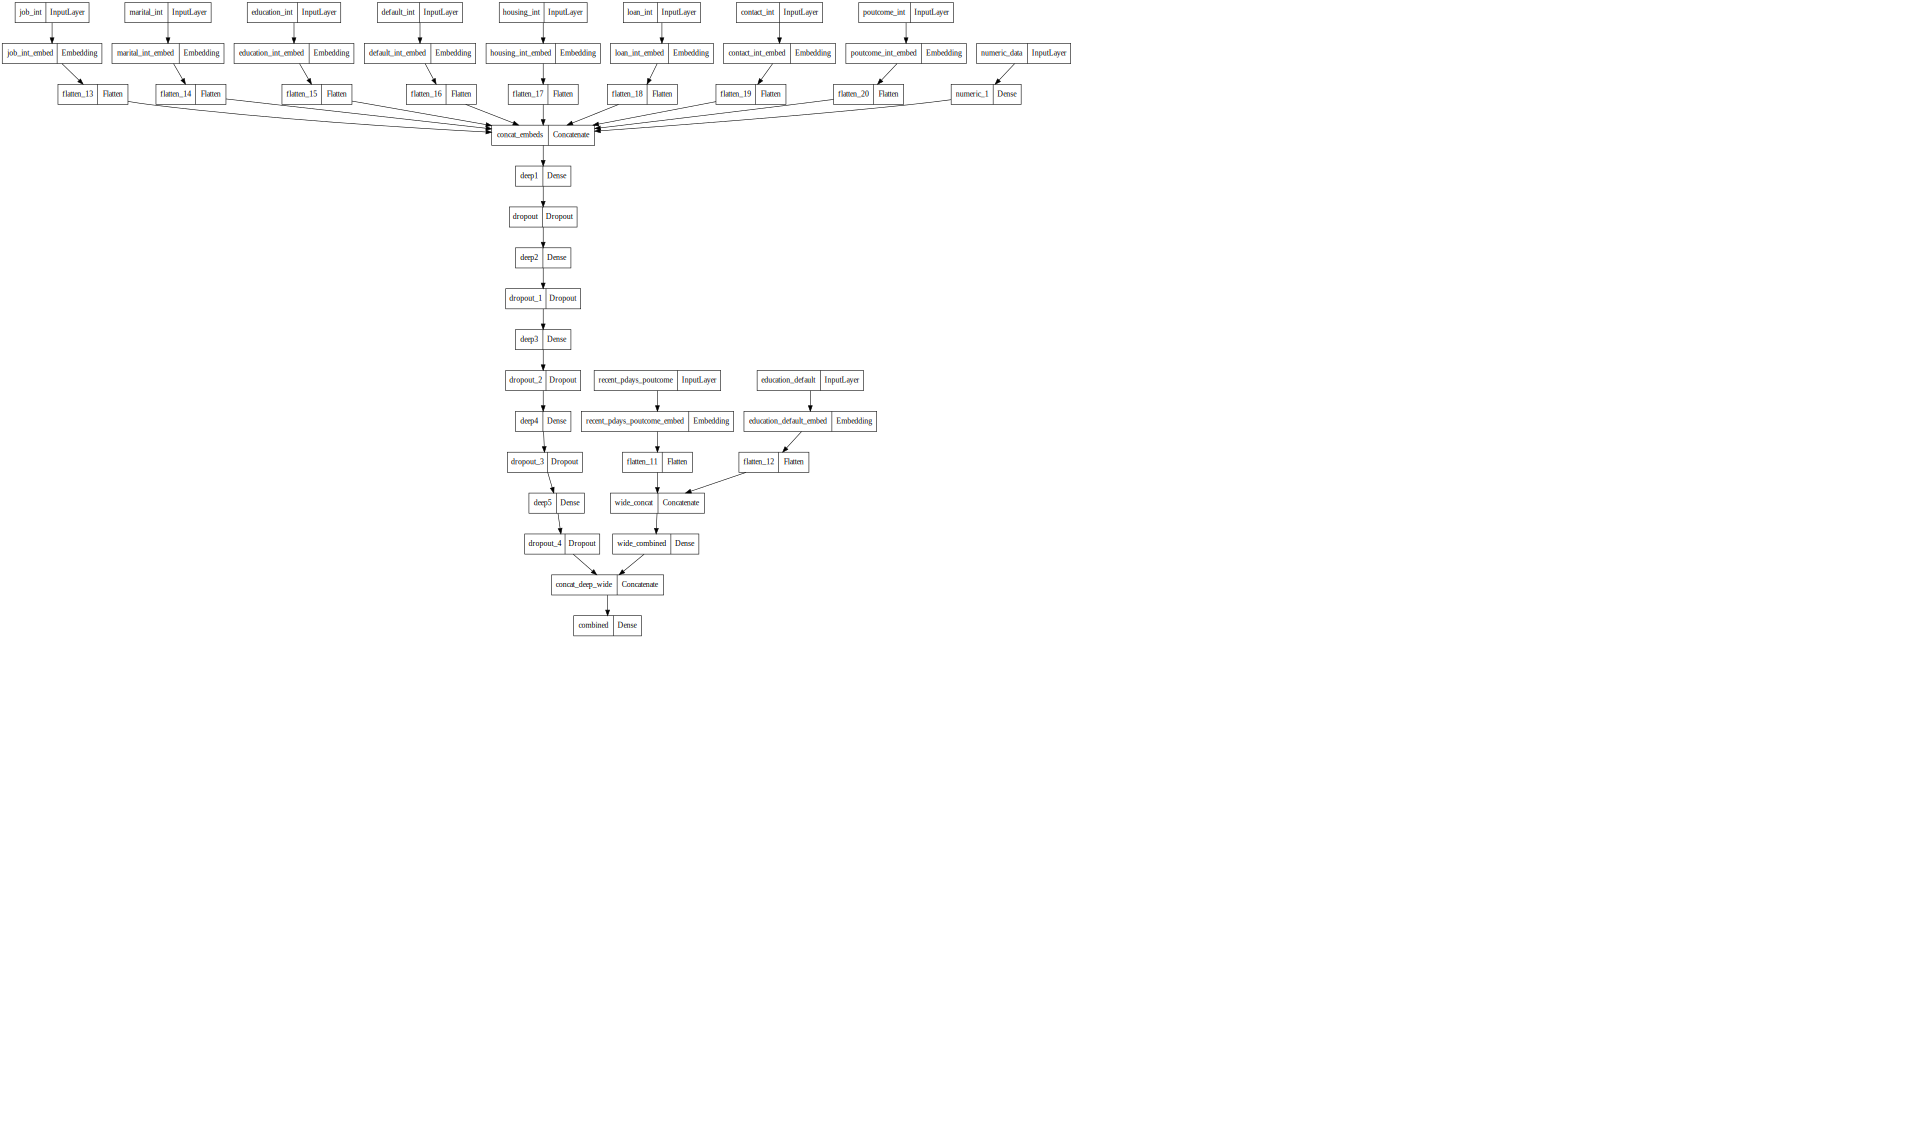

In [36]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Plot the model and save to a file
plot_model(model2, to_file='model2.png', show_shapes=True)

# Display the image file using IPython.display
from IPython.display import Image
Image(filename='model2.png')


In [37]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 job_int (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 marital_int (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 education_int (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 default_int (InputLayer)       [(None, 1)]          0           []                               
                                                                                            

In [38]:
model2.compile(optimizer='adagrad',
               loss='binary_crossentropy',
               metrics=[recall])

y_train = data_train['deposit'].values.astype(np.int)
y_test = data_test['deposit'].values.astype(np.int)

# also add the history variable to see how the model is performing
# add a validation set to keep track of progress
history2 = model2.fit(X_ints_train+[X_train_num],
                      y_train,
                      epochs=50,
                      batch_size=32,
                      verbose=1,
                      validation_data=(X_ints_test + [X_test_num], y_test))
print(history2)

Epoch 1/50
294/294 [==============================] - 3s 4ms/step - loss: 0.7117 - recall: 0.0655 - val_loss: 0.7040 - val_recall: 0.0107
Epoch 2/50
294/294 [==============================] - 1s 4ms/step - loss: 0.7091 - recall: 0.1017 - val_loss: 0.7007 - val_recall: 0.0202
Epoch 3/50
294/294 [==============================] - 1s 4ms/step - loss: 0.7054 - recall: 0.1458 - val_loss: 0.6978 - val_recall: 0.0375
Epoch 4/50
294/294 [==============================] - 1s 4ms/step - loss: 0.7025 - recall: 0.1944 - val_loss: 0.6955 - val_recall: 0.0546
Epoch 5/50
294/294 [==============================] - 1s 4ms/step - loss: 0.7001 - recall: 0.2321 - val_loss: 0.6931 - val_recall: 0.0902
Epoch 6/50
294/294 [==============================] - 1s 4ms/step - loss: 0.6959 - recall: 0.2849 - val_loss: 0.6905 - val_recall: 0.1365
Epoch 7/50
294/294 [==============================] - 1s 4ms/step - loss: 0.6952 - recall: 0.3309 - val_loss: 0.6881 - val_recall: 0.2349
Epoch 8/50
294/294 [==============

In [39]:
from sklearn import metrics as mt

X_test_1 = X_ints_test + [X_test_num]
yprob2 = model2.predict(X_test_1)
yhat2 = np.round(yprob2)

print(mt.confusion_matrix(y_test, yhat2), mt.f1_score(y_test, yhat2))

70/70 [==============================] - 0s 1ms/step
[[874 301]
 [361 697]] 0.6780155642023347


## 2.3.  3rd Model

In [40]:
from keras.layers import Dense, Activation, Input
from keras.models import Model

cross_columns = [['education','default'],['recent_pdays','poutcome','job']]
cross_columns = [['age', 'marital', 'housing'],['recent_pdays','poutcome']]
# create separate sequential models for each embedding
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []
all_deep_branch_outputs = []

# wide branch
for cols in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    # 1. create crossed labels by join operation
    tmp_train = data_train[cols].astype(str) # convert integers to strings so that .join works
    tmp_test = data_test[cols].astype(str)
    X_crossed_train = tmp_train.apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = tmp_test.apply(lambda x: '_'.join(x), axis=1)
    
    # 2. encode as integers
    enc.fit(np.hstack((X_crossed_train.values, X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    
    # 3. save encodings in a list for each branch
    X_ints_train.append(X_crossed_train)
    X_ints_test.append(X_crossed_test)
    
    # get the number of categories in the crossing
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create the embedding branch from the crossed encoding
    inputs = Input(shape=(1,), dtype='int32', name='_'.join(cols))
    all_inputs.append(inputs) # save this as input for the keras.Model
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1,
                  name='_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x) # save for concatenating later
all_wide_branch_outputs

[<KerasTensor: shape=(None, 17) dtype=float32 (created by layer 'flatten_21')>,
 <KerasTensor: shape=(None, 28) dtype=float32 (created by layer 'flatten_22')>]

In [41]:
from keras.layers import concatenate, Dropout
from keras.models import Model
from keras import regularizers

# merge the wide branches together
from keras.layers import concatenate,Dense
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1, activation='sigmoid', name='wide_combined')(wide_branch)

# deep branch
# add in the embeddings
for col in categorical_ints:
    # encode as ints for the embedding
    X_ints_train.append(data_train[col].values.astype(np.int32))
    X_ints_test.append(data_test[col].values.astype(np.int32))
    
    # get the number of categories
    N = int(max(X_ints_train[-1]))+1# same as the max(df_train[col])
    # create the embedding branch from the number of categories
    inputs = Input(shape=(1,), dtype='int32', name=col)  
    all_inputs.append(inputs)
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1,
                  name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
X_train_num = data_train[numeric_features].values.astype(np.int32)
X_test_num = data_test[numeric_features].values.astype(np.int32)

all_inputs.append(Input(shape=(X_train_num.shape[1],),
                        sparse=False,
                        name='numeric_data'))

x = Dense(units=20, activation='relu', name='numeric_1')(all_inputs[-1])
all_deep_branch_outputs.append(x)

#merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
deep_branch = Dense(units=50, activation='relu', name='deep1')(deep_branch)
deep_branch = Dropout(rate=0.25)(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep2')(deep_branch)
deep_branch = Dropout(rate=0.25)(deep_branch)
deep_branch = Dense(units=10, activation='relu',  name='deep3')(deep_branch)
deep_branch = Dropout(rate=0.25)(deep_branch)


final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
final_branch = Dense(units=1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01), name='combined')(final_branch)

model3 = Model(inputs=all_inputs, outputs=final_branch)

In [42]:
from IPython.display import SVG
import graphviz
from keras.utils.vis_utils import model_to_dot
import pydot
SVG(model_to_dot(model3, dpi=60).create(prog='dot', format='svg'))
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 job_int (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 marital_int (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 education_int (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 default_int (InputLayer)       [(None, 1)]          0           []                               
                                                                                            

In [43]:
model3.compile(optimizer='adagrad',
               loss='binary_crossentropy',
               metrics=[recall])

y_train = data_train['deposit'].values.astype(np.int)
y_test = data_test['deposit'].values.astype(np.int)

# also add the history variable to see how the model is performing
# add a validation set to keep track of progress
history3 = model3.fit(X_ints_train+[X_train_num],
                      y_train,
                      epochs=50,
                      batch_size=32,
                      verbose=1,
                      validation_data=(X_ints_test + [X_test_num], y_test))

Epoch 1/50
294/294 [==============================] - 3s 4ms/step - loss: 0.7412 - recall: 1.7007e-04 - val_loss: 0.7244 - val_recall: 0.0000e+00
Epoch 2/50
294/294 [==============================] - 1s 4ms/step - loss: 0.7302 - recall: 6.5069e-04 - val_loss: 0.7187 - val_recall: 0.0000e+00
Epoch 3/50
294/294 [==============================] - 1s 4ms/step - loss: 0.7257 - recall: 4.2517e-04 - val_loss: 0.7152 - val_recall: 0.0000e+00
Epoch 4/50
294/294 [==============================] - 1s 3ms/step - loss: 0.7215 - recall: 0.0028 - val_loss: 0.7125 - val_recall: 0.0000e+00
Epoch 5/50
294/294 [==============================] - 1s 3ms/step - loss: 0.7187 - recall: 0.0069 - val_loss: 0.7100 - val_recall: 0.0011
Epoch 6/50
294/294 [==============================] - 1s 3ms/step - loss: 0.7163 - recall: 0.0110 - val_loss: 0.7078 - val_recall: 0.0046
Epoch 7/50
294/294 [==============================] - 1s 3ms/step - loss: 0.7131 - recall: 0.0241 - val_loss: 0.7056 - val_recall: 0.0092
Epoch 

In [44]:
from sklearn import metrics as mt

X_test_1 = X_ints_test + [X_test_num]
yprob3 = model3.predict(X_test_1)
yhat3 = np.round(yprob3)

print(mt.confusion_matrix(y_test, yhat3), mt.recall_score(y_test, yhat3))

70/70 [==============================] - 0s 1ms/step
[[745 430]
 [280 778]] 0.7353497164461248


# 2.4 Comparing the performance with MLP

In [45]:
from sklearn.preprocessing import OneHotEncoder
# combine the features with two branches
# let's encode the integer outputs as one hot encoded labels
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(data_train[categorical_ints].values)
X_test_ohe = ohe.transform(data_test[categorical_ints].values)

# and save off the numeric features
X_train_num =  data_train[numeric_features].values
X_test_num = data_test[numeric_features].values

# create sparse input branch for ohe
inputsSparse = Input(shape=(X_train_ohe.shape[1],),sparse=False, name='X_ohe')
xSparse = Dense(units=10, activation='relu', name='ohe_1')(inputsSparse)

# create dense input branch for numeric
inputsDense = Input(shape=(X_train_num.shape[1],),sparse=False, name='X_Numeric')
xDense = Dense(units=10, activation='relu',name='num_1')(inputsDense)

x = concatenate([xSparse, xDense], name='concat')
x2 = Dense(1,activation='relu', name='combined_1')(x)
predictions = Dense(1,activation='sigmoid', name='combined_2')(x2)

# This creates a model that includes
# the Input layer and Dense layers
mlp_model = Model(inputs=[inputsSparse,inputsDense], outputs=predictions)

mlp_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X_ohe (InputLayer)             [(None, 32)]         0           []                               
                                                                                                  
 X_Numeric (InputLayer)         [(None, 6)]          0           []                               
                                                                                                  
 ohe_1 (Dense)                  (None, 10)           330         ['X_ohe[0][0]']                  
                                                                                                  
 num_1 (Dense)                  (None, 10)           70          ['X_Numeric[0][0]']              
                                                                                            

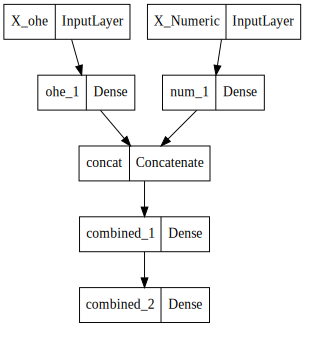

In [46]:
SVG(model_to_dot(mlp_model,dpi=70).create(prog='dot', format='svg'))

In [47]:
mlp_model.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=[recall])

y_train = data_train['deposit'].values.astype(np.int)
y_test = data_test['deposit'].values.astype(np.int)

history_mlp = mlp_model.fit([X_train_ohe, X_train_num], # inputs for each branch are a list
                             y_train, 
                             epochs=50, 
                             batch_size=32, 
                             verbose=1,
                             validation_data=([X_test_ohe, X_test_num], y_test))

X_test_mlp = [X_test_ohe, X_test_num]
yprob_mlp = mlp_model.predict(X_test_mlp) # each branch has an input
yhat_mlp = np.round(yprob_mlp)

Epoch 1/50
294/294 [==============================] - 2s 3ms/step - loss: 0.6928 - recall: 0.0000e+00 - val_loss: 0.6927 - val_recall: 0.0000e+00
Epoch 2/50
294/294 [==============================] - 1s 3ms/step - loss: 0.6928 - recall: 0.0000e+00 - val_loss: 0.6926 - val_recall: 0.0000e+00
Epoch 3/50
294/294 [==============================] - 1s 2ms/step - loss: 0.6927 - recall: 0.0000e+00 - val_loss: 0.6925 - val_recall: 0.0000e+00
Epoch 4/50
294/294 [==============================] - 1s 2ms/step - loss: 0.6926 - recall: 0.0000e+00 - val_loss: 0.6925 - val_recall: 0.0000e+00
Epoch 5/50
294/294 [==============================] - 1s 2ms/step - loss: 0.6925 - recall: 0.0000e+00 - val_loss: 0.6924 - val_recall: 0.0000e+00
Epoch 6/50
294/294 [==============================] - 1s 2ms/step - loss: 0.6924 - recall: 0.0000e+00 - val_loss: 0.6922 - val_recall: 0.0000e+00
Epoch 7/50
294/294 [==============================] - 1s 2ms/step - loss: 0.6923 - recall: 0.0026 - val_loss: 0.6921 - val_r

In [48]:
X_test_mlp = [X_test_ohe, X_test_num]
yprob_mlp = mlp_model.predict(X_test_mlp) # each branch has an input
yhat_mlp = np.round(yprob_mlp)

print(mt.confusion_matrix(y_test, yhat_mlp), mt.recall_score(y_test, yhat_mlp))

70/70 [==============================] - 0s 2ms/step
[[1044  131]
 [ 622  436]] 0.4120982986767486


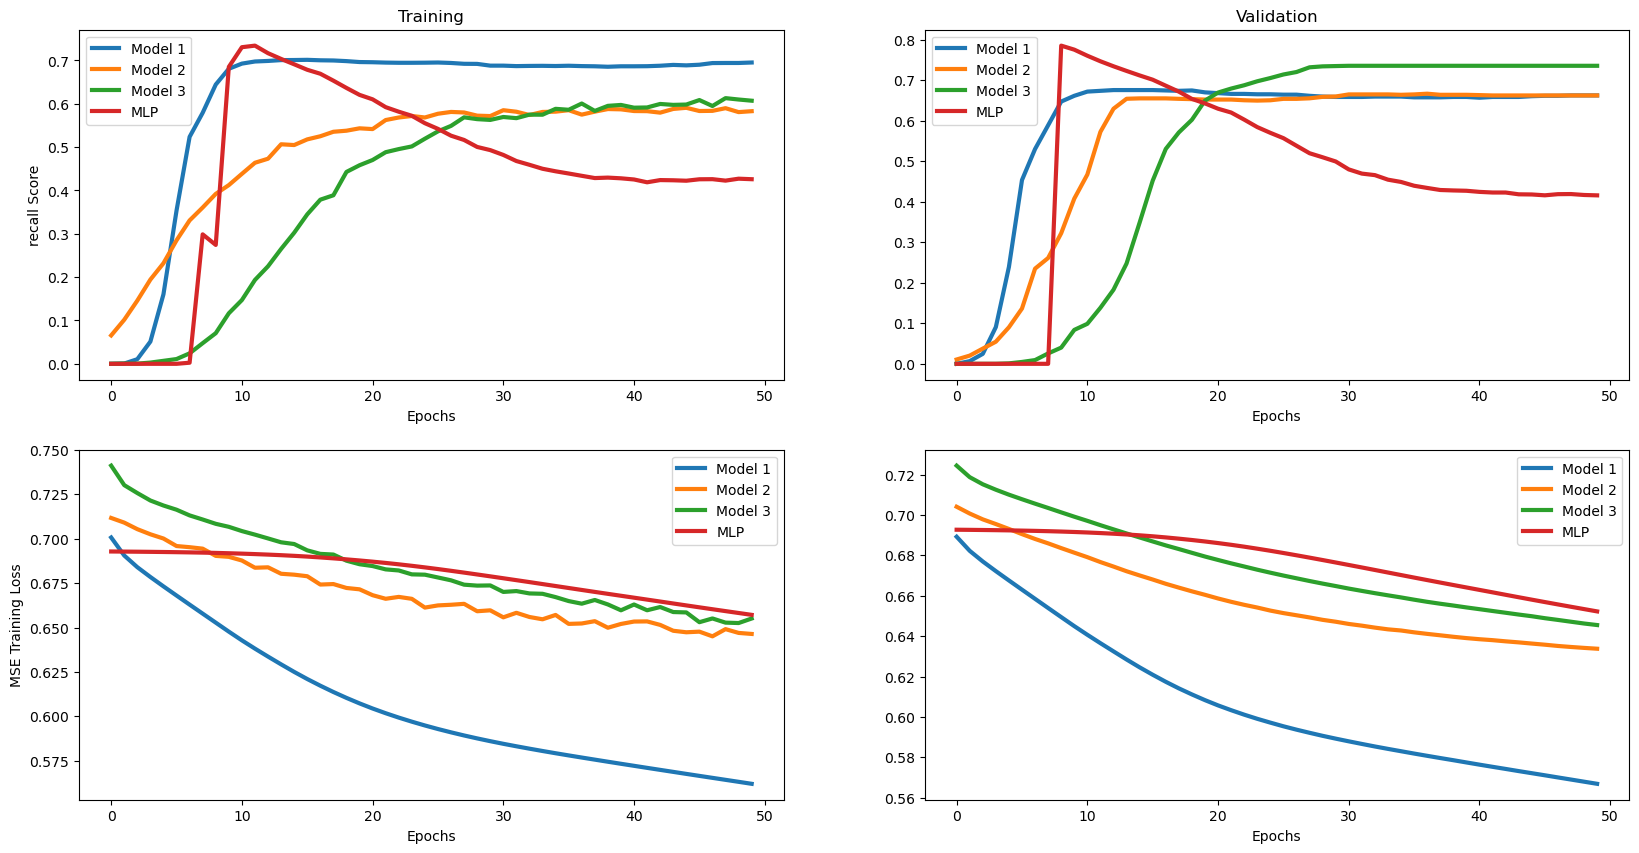

In [49]:

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(history1.history['recall'], lw=3.0)
plt.plot(history2.history['recall'], lw=3.0)
plt.plot(history3.history['recall'], lw=3.0)
plt.plot(history_mlp.history['recall'], lw=3.0)
plt.ylabel('recall Score')
plt.xlabel('Epochs')
plt.title('Training')
plt.legend(['Model 1', 'Model 2', 'Model 3','MLP'])

plt.subplot(2,2,2)
plt.plot(history1.history['val_recall'], lw=3.0)
plt.plot(history2.history['val_recall'], lw=3.0)
plt.plot(history3.history['val_recall'], lw=3.0)
plt.plot(history_mlp.history['val_recall'], lw=3.0)
plt.xlabel('Epochs')
plt.title('Validation')
plt.legend(['Model 1', 'Model 2', 'Model 3','MLP'])

plt.subplot(2,2,3)
plt.plot(history1.history['loss'], lw=3.0)
plt.plot(history2.history['loss'], lw=3.0)
plt.plot(history3.history['loss'], lw=3.0)
plt.plot(history_mlp.history['loss'], lw=3.0)
plt.ylabel('MSE Training Loss')
plt.xlabel('Epochs')
plt.legend(['Model 1', 'Model 2', 'Model 3','MLP'])

plt.subplot(2,2,4)
plt.plot(history1.history['val_loss'], lw=3.0)
plt.plot(history2.history['val_loss'], lw=3.0)
plt.plot(history3.history['val_loss'], lw=3.0)
plt.plot(history_mlp.history['val_loss'], lw=3.0)
plt.xlabel('Epochs')
plt.legend(['Model 1', 'Model 2', 'Model 3','MLP'])


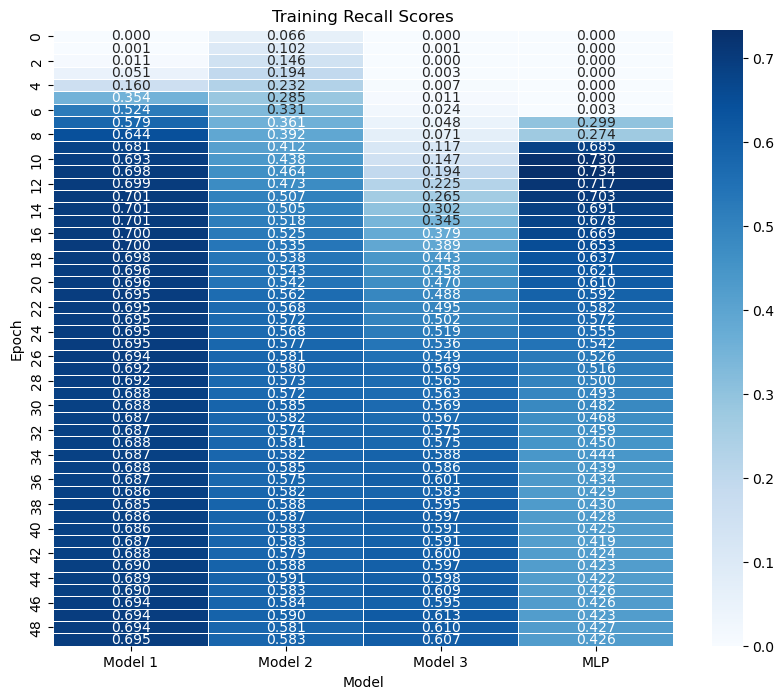

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# combine training history dictionaries for each model
train_recall = {'Model 1': history1.history['recall'], 
                'Model 2': history2.history['recall'], 
                'Model 3': history3.history['recall'], 
                'MLP': history_mlp.history['recall']}
train_df = pd.DataFrame(train_recall)

# create heatmap for training recall
plt.figure(figsize=(10, 8))
sns.heatmap(train_df, cmap='Blues', annot=True, fmt='.3f', linewidths=.5)
plt.title('Training Recall Scores')
plt.xlabel('Model')
plt.ylabel('Epoch')
plt.show()


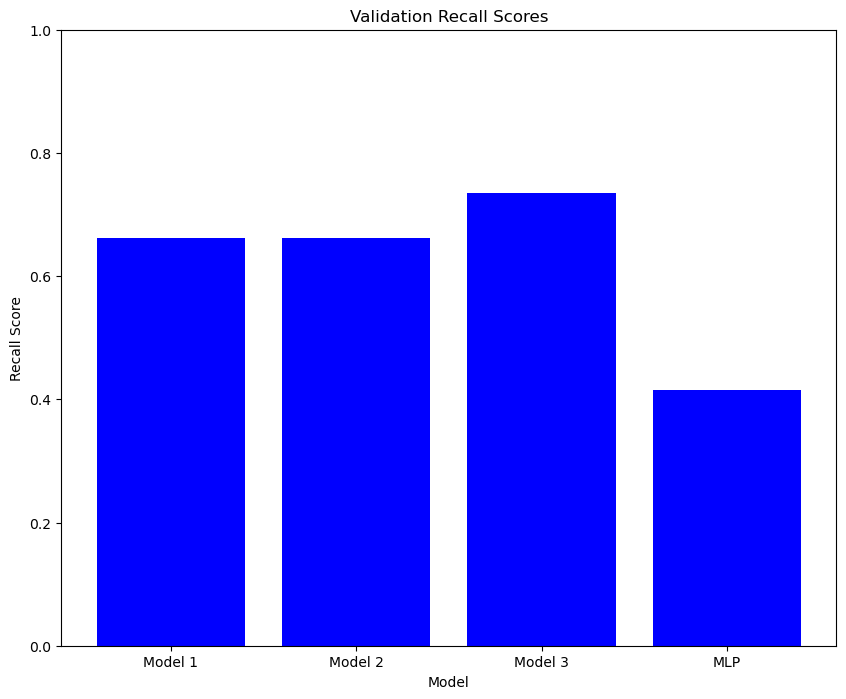

In [51]:
import matplotlib.pyplot as plt

# create a list of the model names
model_names = ['Model 1', 'Model 2', 'Model 3', 'MLP']

# create a list of the validation recall scores for each model
val_recall_scores = [history1.history['val_recall'][-1], 
                     history2.history['val_recall'][-1], 
                     history3.history['val_recall'][-1], 
                     history_mlp.history['val_recall'][-1]]

# create a bar plot of the validation recall scores
plt.figure(figsize=(10, 8))
plt.bar(model_names, val_recall_scores, color='b')
plt.title('Validation Recall Scores')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.ylim([0.0, 1.0])
plt.show()


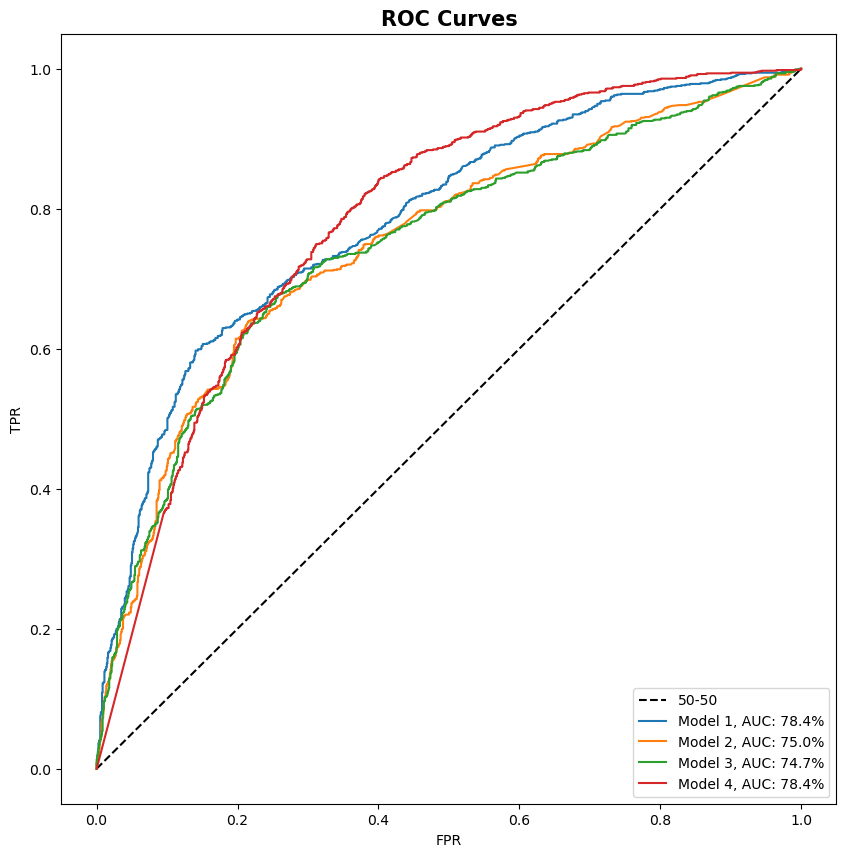

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

fig, ax = plt.subplots(figsize=(10, 10))

# Plot 50-50 Line
ax.plot([0,1],[0,1], ls='--', color='k', label='50-50')

for i, y_pred in enumerate([yprob1, yprob2, yprob3, yprob_mlp]):
    y_pred = np.squeeze(y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    label = 'Model {}, AUC: {}%'.format(i+1, round(100*auc,1))
    ax.plot(fpr, tpr, label=label)
    
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC Curves', fontweight='bold', fontsize=15)
ax.legend(loc='lower right')
plt.show()

According to the results above, it appears that the standard multi-layer perceptron (MLP) has a similar AUC score as our best wide and deep network in terms of AUC score which is Model 1. They both had an AUC score of 78.4. However, the MLP had a recall score of 0.4121, which is far less than the recall score of our best model in that case which was Model 3 with a recall score of 0.7353. These results suggest that the a wide and deep network may be a better choice for our problem, as it has higher predictive performance.

# 3. Exceptional Work

In [71]:
from keras.layers import Dense, Activation, Input
from keras.models import Model

cross_columns = [['education','default'],['housing','loan']]
# create separate sequential models for each embedding
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []
all_deep_branch_outputs = []

# wide branch
for cols in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    # 1. create crossed labels by join operation
    tmp_train = data_train[cols].astype(str) # convert integers to strings so that .join works
    tmp_test = data_test[cols].astype(str)
    X_crossed_train = tmp_train.apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = tmp_test.apply(lambda x: '_'.join(x), axis=1)
    
    # 2. encode as integers
    enc.fit(np.hstack((X_crossed_train.values, X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    
    # 3. save encodings in a list for each branch
    X_ints_train.append(X_crossed_train)
    X_ints_test.append(X_crossed_test)
    
    # get the number of categories in the crossing
    N=int(max(X_ints_train[-1]))+1
   
    # create the embedding branch from the crossed encoding
    inputs = Input(shape=(1,), dtype='int32', name='_'.join(cols))
    all_inputs.append(inputs) # save this as input for the keras.Model
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1,
                  name='_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x) # save for concatenating later

In [72]:
# merge the wide branches together
from keras.layers import concatenate,Dense
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1, activation='sigmoid', name='wide_combined')(wide_branch)

# deep branch
# add in the embeddings
for col in categorical_ints:
    # encode as ints for the embedding
    X_ints_train.append(data_train[col].values.astype(np.int))
    X_ints_test.append(data_test[col].values.astype(np.int))
    
    # get the number of categories
    N = int(max(X_ints_train[-1]))+1 # same as the max(df_train[col])

    # create the embedding branch from the number of categories
    inputs = Input(shape=(1,), dtype='int32', name=col)
    all_inputs.append(inputs)
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1,
                  name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
X_train_num = data_train[numeric_features].values.astype(np.int)
X_test_num = data_test[numeric_features].values.astype(np.int)

all_inputs.append(Input(shape=(X_train_num.shape[1],),
                        sparse=False,
                        name='numeric_data'))

x = Dense(units=20, activation='relu', name='numeric_1')(all_inputs[-1])
all_deep_branch_outputs.append(x)

# merge the deep branches together
# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)

model1 = Model(inputs=all_inputs, outputs=final_branch)

In [73]:
#%%time
model1.compile(optimizer='adagrad',
               loss='binary_crossentropy',
               metrics=[recall])

y_train = data_train['deposit'].values.astype(np.int)
y_test = data_test['deposit'].values.astype(np.int)

# also add the history variable to see how the model is performing
# add a validation set to keep track of progress
history1 = model1.fit(X_ints_train+[X_train_num],
                      y_train, epochs=50,batch_size=32,verbose=1,
                      validation_data=(X_ints_test + [X_test_num], y_test))

Epoch 1/50
294/294 [==============================] - 2s 4ms/step - loss: 0.6873 - recall: 0.9921 - val_loss: 0.6862 - val_recall: 0.9932
Epoch 2/50
294/294 [==============================] - 1s 3ms/step - loss: 0.6764 - recall: 0.9908 - val_loss: 0.6766 - val_recall: 0.9926
Epoch 3/50
294/294 [==============================] - 1s 3ms/step - loss: 0.6666 - recall: 0.9888 - val_loss: 0.6676 - val_recall: 0.9766
Epoch 4/50
294/294 [==============================] - 1s 3ms/step - loss: 0.6578 - recall: 0.8352 - val_loss: 0.6598 - val_recall: 0.7566
Epoch 5/50
294/294 [==============================] - 1s 2ms/step - loss: 0.6498 - recall: 0.7708 - val_loss: 0.6524 - val_recall: 0.7417
Epoch 6/50
294/294 [==============================] - 1s 3ms/step - loss: 0.6424 - recall: 0.7693 - val_loss: 0.6457 - val_recall: 0.7426
Epoch 7/50
294/294 [==============================] - 1s 2ms/step - loss: 0.6356 - recall: 0.7661 - val_loss: 0.6396 - val_recall: 0.7414
Epoch 8/50
294/294 [==============

In [74]:
model1.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 job_int (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 marital_int (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 education_int (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 default_int (InputLayer)       [(None, 1)]          0           []                               
                                                                                            

In [78]:
from sklearn.manifold import TSNE

M_range_int_embed = []
M_range_weight = model1.get_layer("job_int_embed").get_weights()[0]
np.set_printoptions(suppress=True) # stop using scientific notation
M_range = encoders["job"].classes_


# extract the x and y
tsne = TSNE(n_components=2, perplexity=30, init='pca', random_state=0, verbose=1)
data_tsne = pd.DataFrame(data=tsne.fit_transform(M_range_weight))

x_list = data_tsne[0]
y_list = data_tsne[1]
M_range_weight

[t-SNE] Computing 11 nearest neighbors...
[t-SNE] Indexed 12 samples in 0.000s...
[t-SNE] Computed neighbors for 12 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 12 / 12
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.003700
[t-SNE] KL divergence after 1000 iterations: 0.288895


array([[-0.01290062,  0.04147268,  0.02926104],
       [-0.07066799,  0.08605566,  0.04029945],
       [ 0.00708906,  0.00439406,  0.00843592],
       [-0.0264514 ,  0.03825539,  0.00488649],
       [ 0.04739524,  0.00282228,  0.00808866],
       [ 0.05707882, -0.07042468,  0.01699313],
       [-0.01410374,  0.04412419, -0.04269167],
       [-0.01263263,  0.05638909,  0.00226875],
       [ 0.05272597, -0.0813858 ,  0.03481004],
       [ 0.00239519,  0.03935653,  0.04869325],
       [ 0.01825471, -0.05710711,  0.02216257],
       [-0.03692263, -0.01777154, -0.01470617]], dtype=float32)

In [79]:
df_tsne

,0,1
0,53.075073,53.545483
1,-95.720901,66.864716
2,2.948428,-45.304070
3,151.744186,-58.624180
4,66.418144,-113.310501
5,-10.394324,121.552002
6,-89.419106,-34.286331
7,77.440033,-20.944420
8,145.442917,42.526726
9,-34.730362,-119.609291


In [82]:
(x,y)

(-21.41651725769043, 29.185806274414062)

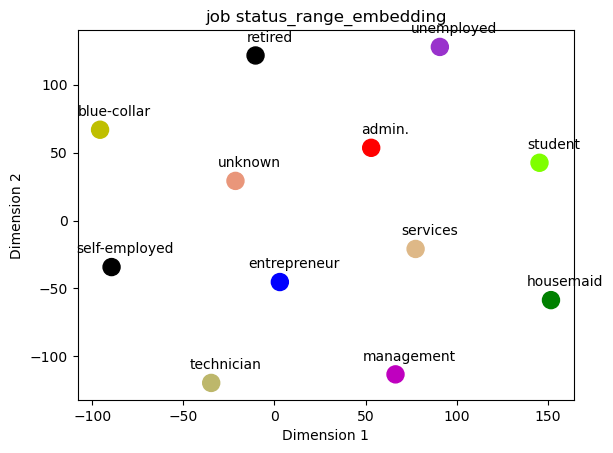

In [88]:
index = 0
for x,y in zip(x_list, y_list):
    ar = M_range[index]
    plt.annotate(ar,xy=(x,y), textcoords='offset points',xytext=(10,10),ha='center')
    index += 1
    
c_value = ['r','y','b','g','m','k','k','burlywood','chartreuse','darkkhaki','darkorchid','darksalmon']
plt.scatter(x_list, y_list, s=150, c=c_value)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('job status_range_embedding')
plt.show()

In our code, we are using TSNE to extract the x and y coordinates from the embedding weights of a deep network. Based on the figure above we can see that the embedding weights on job status is working perfectly and it can cluster the different levels of job status range by 2 components in a way that they are distinguishable and this input can be usefull to our model for training. The clusters here are dfined by a colored dot and the label explains each job.

In [91]:
education_range_int_embed = []
education_range_weight = model1.get_layer("education_int_embed").get_weights()[0]

np.set_printoptions(suppress=True) # stop using scientific notation
education_range = encoders["education"].classes_

# extract the x and y
x_list = education_range_weight[:,0]
y_list = education_range_weight[:,1]
print(education_range_weight)

[[ 0.02925451  0.05865861]
 [ 0.1336294   0.09065282]
 [ 0.0832273  -0.03188731]
 [ 0.03113659 -0.00224622]]


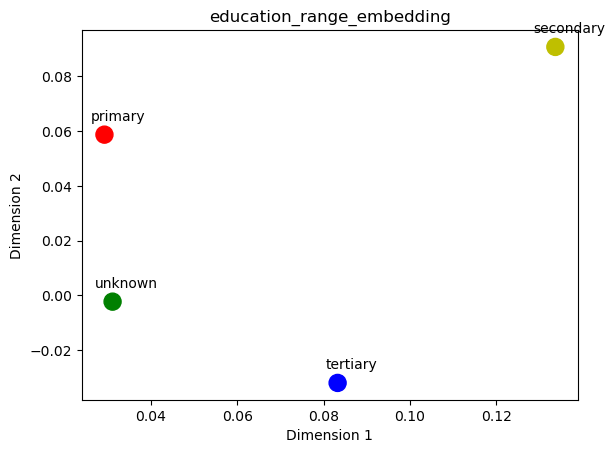

In [93]:
index = 0
for x,y in zip(x_list, y_list):
    ar = education_range[index]
    plt.annotate(ar,xy=(x,y), textcoords='offset points',xytext=(10,10),ha='center')
    index += 1
    
c_value = ['r','y','b','g']
plt.scatter(x_list, y_list, s=150, c=c_value)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('education_range_embedding')
plt.show()

The education level is another variable that can be clustered by the embeding weights and it provides a very useful information to our model.

The clusters in the data represent groups of points that are similar to each other in terms of their job status range or education range value. The TSNE algorithm tries to preserve the local structure of the data in the embedding space.

Therefore, points that belong to the same cluster are likely to have similar job status range or education range values. The color of each point in the scatter plot represents the job status range or education range value for that point, and the c_value list contains color values for each job status range or education range value.